# Discrete Probability Distributions

In [ ]:
np.median(poisson.rvs(size=10000))

70.0

## Introduction

In this lesson we will focus on discrete probability distributions. 

We will learn about:

- What a discrete random variable is;

- The probability mass function;

- How to compute values from a given discrete distribution using scipy stats;

- Various types of discrete probability distributions. 

### Discrete Random Variables


Consider an experiment where we are rolling a die twice.



> $S = \{ (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (2,1), (2,2), (2,3), .......... \}$



This can be represented by a random variable X as follows:



> X = {Sum of numbers on the die when rolled twice}



Why is this a **discrete random variable**?

Because the outcomes are **finite** and **discrete**. 

In the case of a double dice roll, there are only 11 possible outcomes. 



1.   P{X = 2} = P{(1, 1)} = 1/36
2.   P{X = 3} = P{(1, 2), (2, 1)} =2/36
3.   P{X = 4} = P{(1, 3), (2, 2), (3, 1)} = 3/36
4.   P{X = 5} = P{(1, 4), (2, 3), (3, 2), (4, 1)} = 4/36
5.   P{X = 6} = P{(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)} = 5/36
6.   P{X = 7} = P{(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)} = 6/36
7.   P{X = 8} = P{(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)} = 5/36
8.   P{X = 9} = P{(3, 6), (4, 5), (5, 4), (6, 3)} = 4/36
9.   P{X = 10} = P{(4, 6), (5, 5), (6, 4)} = 3/36
10.   P{X = 11} = P{(5, 6), (6, 5)} = 2/36
11.   P{X = 12} = P{(6, 6)} = 1/36



For a **non-discrete** variable, the outcome is (close to) infinite. 

For example, for the random variable **income**, we can say that a person can make (read: take the values of) 1000 dollars a year, another one makes 30000 dollars a year, yet another one makes 1001.99 dollars a year... etc. 

The set of possible outcomes is simply too large to count and therefore not discrete. 

**Important**: Keep the following in mind:

The sum of all the probabilities added together is 1:



> $\sum_{x_{i}} P(X=x_{i}) = 1$



### The Gaussian

First of all, we'll examine a probability distribution we should all be familiar with by now: the normal distribution or Gaussian. 

Let us first import the necessary libraries. 

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import norm 

Let us now generate a Gaussian. The only thing we'll need for that are the two parameters that characterize the Gaussian. These are:

1. The **mean**;

2. The **standard deviation**. 

In [ ]:
# loc = mean
# scale = stdev
# size = # of data points
#gaussian = np.random.normal(loc=0, scale=1, size=1000)
gaussian = norm.rvs(loc=0, scale=1, size=1000)

In [ ]:
gauss_values = pd.DataFrame(gaussian, columns = ['Gaussian'])
gauss_values

,Gaussian
0,0.056054
1,1.981777
2,0.452792
3,-0.155816
4,-0.630959
...,...
995,0.229037
996,1.234898
997,1.195622
998,-0.987876


In [ ]:
print('Mean:', gauss_values.mean())
print('\n')
print('Stdev:', gauss_values.std())

Mean: Gaussian   -0.029232
dtype: float64


Stdev: Gaussian    1.018291
dtype: float64


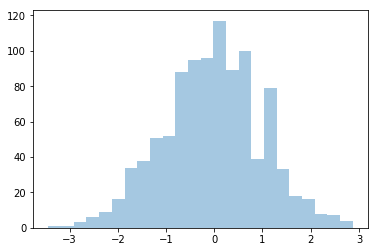

In [ ]:
# number of bins check
sns.distplot(gauss_values, kde=False)

This is an example of a standard normal curve. However, we can model many bell-shaped distributions this way. 

Take for instance IQ. IQ is normally distributed. The mean is 100 and the standard deviation is 15. Let's draw data points and plot the distribution. 

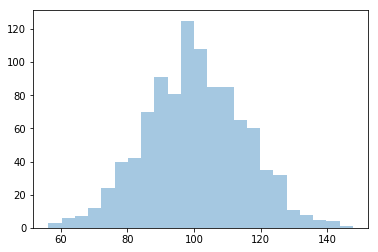

In [ ]:
gaussian = norm.rvs(loc=100, scale=15, size=1000)
sns.distplot(gaussian, kde=False)

### Probability Mass Function 


The probability mass function (PMF) is a function for a discrete random variable that allows us to express the entire distribution as one single function. 


The math can become quite complicated, but the idea is simple. Let us look at a visualization.

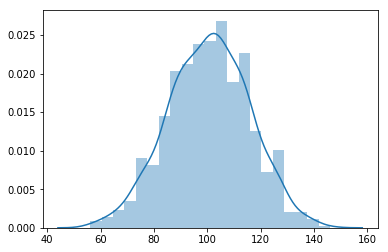

In [ ]:
gaussian = norm.rvs(loc=100, scale=15, size=1000)
sns.distplot(gaussian, kde=True) 

As can be seen, the blue line is a function that "captures" the entire distribution. In a way, it is a model of the distribution for IQ. 

**Important:** The area under the curve (blue line) is 1, since it captures 100 percent of the data. 

Suppose that we now want to know what percentage of people have an IQ of lower than 120. Let us examine the plot again. 

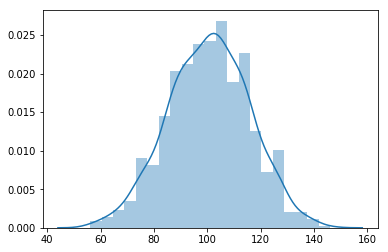

In [ ]:
sns.distplot(gaussian, kde=True)

One way to determine this number is by looking at how many data points there are at 120 -. However, a better way would be to compute this number using our probability mass function.

If we want to compute the probability of people with an IQ of lower than 120, we can use the stats.cdf function where cdf stands for **cumulative density function.** 

In [ ]:
# loc = mean
# scale = stdev
# size = # of data points
mu = 100
sigma = 15

norm.cdf(120,loc=mu,scale=sigma) 

0.9087887802741321

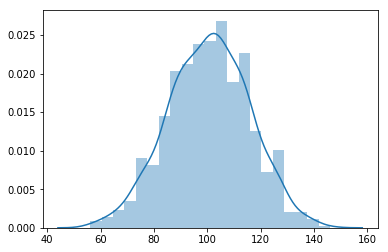

In [ ]:
sns.distplot(gaussian, kde=True)

Now suppose that we want to find the percentage of people with an IQ of between 128 and 142. Again, we could read this off of the plot. However, to get a more precise number, we can also use the following:

In [ ]:
norm.cdf(142,loc=mu,scale=sigma) - norm.cdf(128,loc=mu,scale=sigma) 

0.02841894537631262

Lastly, if we want the exact percentage of people with an IQ of 120, we can use the following method. 

In [ ]:
norm.pdf(120, loc=mu,scale=sigma)

0.010934004978399577

Note that this pdf denotes **probability *density* formula**. More about this in the following lecture.

In [ ]:
# pdf accepts any value
norm.pdf(91.2973973492798217983274897238147987348282818388578, loc=mu,scale=sigma)

0.022476400538129035

## Types of Discrete Random Variables 


### Bernoulli Random Variables






This distribution occurs when the outcome can be classified as either a “success” or as a “failure”. Therefore the outcome equals 1 there is a success and a 0 if it results in failure.

$P(X = 1) = p$,  where $p$ is the probability of success

$P(X = 0) = 1 − p$

Also note that if we sample from a distribution, we denote this as 

$$x_{i} \sim Ber(p).$$

In the example provided below, we sample from a random Bernoulli variable with a success probability of 0.8. Hence,

$$x_{i} \sim Ber(0.8)$$

Let us first import the necessary libraries.

In [ ]:
import scipy
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

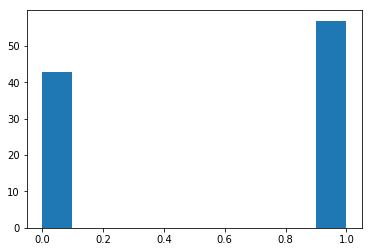

In [ ]:
p = 0.6    
bernoulli = bernoulli.rvs(p, size=100)
plt.hist(bernoulli)
plt.show()

### Binomial Distribution

In [ ]:
%matplotlib inline
from scipy import stats
from scipy.stats import binom

For an explanation of the binomial distribution, let's have look at the following clip.

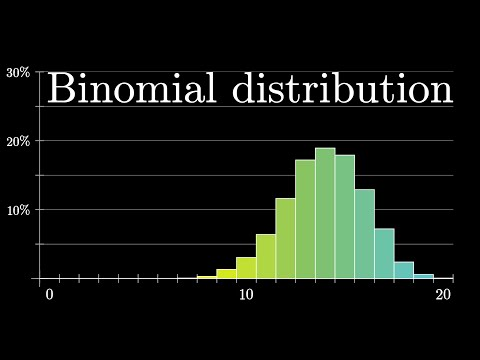

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('8idr1WZ1A7Q', width=800, height=500)

Now that we've seen the example from 3B1B, let us implement this. Recall that we are looking for 48 positive reviews vs. 2 negative reviews.

In [ ]:
n=48
p=0.95
binomial = binom(n,p)
#binomial.rvs(1000)

0.21538759663403698


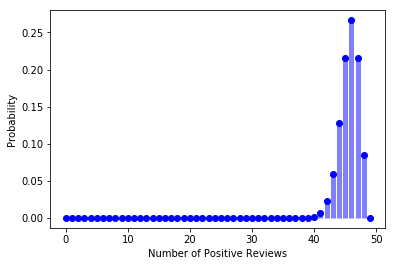

In [ ]:
x = np.arange(0,50)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Probability') 

print(binomial.pmf(47))

To obtain the probability that we obtain exactly 48 positive reviews, we can use the pmf method (probability mass function).  

In [ ]:
print(binomial.pmf(48))

0.08525759033430823


In [ ]:
# pmf does not accept any value
print(binomial.pmf(48.34242782)) 

0.0


### Poisson Random Variable


We often encounter this distribution when we want to determine the frequency of something within a given unit of time.

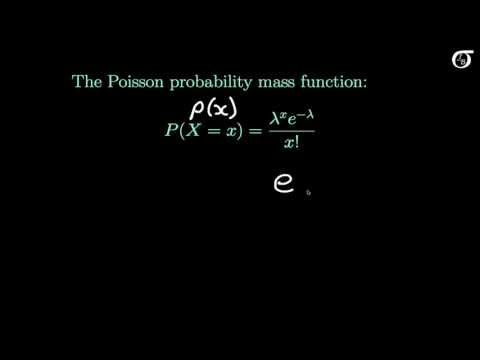

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('jmqZG6roVqU', width=800, height=500)

Before moving on, let's first import the necessary libraries. 

In [ ]:
%matplotlib inline 
from scipy import stats
from scipy.stats import poisson

Let us know implement the example from the clip. Recall that what we want to find is the probability that there are exactly 3 radioactive decays for Plutonium-239 within a 2-second time frame given that the average decay is 2.3 per second.

In [ ]:
lambda_possoin = 2.3 * 2
poisson = stats.poisson(lambda_possoin)
# Draw random samples
print('The probability that there are 3 decays within a 2-second time frame is:', round(poisson.pmf(3), 4))

The probability that there are 3 decays within a 2-second time frame is: 0.1725


Text(0,0.5,'Probability')

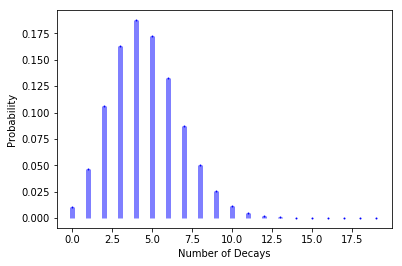

In [ ]:
x = np.arange(0,20)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x), 'bo', ms=1, label='poisson pmf')
#Plot axis vertical lines
ax.vlines(x, 0, poisson.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Decays')
plt.ylabel('Probability')

Suppose you like to watch the Tour de France. Per every 40 kilometer on average 20 out of the total 218 runners will fall. What is the probability that if you're watching an etappe of 140 kilometers you'll see at least 80 runners fall.

In [ ]:
lambda_possoin = 20 * (140 / 40)
poisson = stats.poisson(lambda_possoin)
# Draw random samples
print('The probability that you will see 80 at least runners fall is:', 1 - round(poisson.cdf(80), 4))

The probability that you will see 80 at least runners fall is: 0.10660000000000003


Text(0,0.5,'Probability')

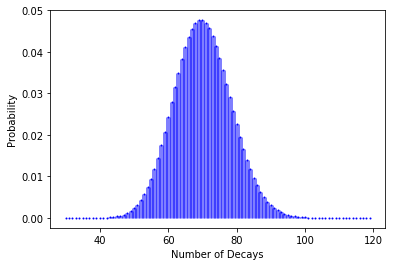

In [ ]:
x = np.arange(30,120)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x), 'bo', ms=1, label='poisson pmf')
#Plot axis vertical lines
ax.vlines(x, 0, poisson.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Decays')
plt.ylabel('Probability')

## Summary 

In this lesson we learnt about:

- Discrete random variables;


- Discrete probability distributions;  

- PMF (probability mass function);

- Important distributions including Bernoulli's, binomial, and Poisson distribution along with its application in python using SciPy library. 

In [ ]:
## Appendix

### Parameters

Parameters are an important concept in statistics. Before we move on to some examples, consider these two 'text-book' definitions:

    "[A] set of facts which describes and puts limits on how something should happen or be done."
*Cambridge Dictionary*

    "[A]n arbitrary constant whose value characterizes a member of a system (such as a family of curves)"
*Merriam Webster Dictionary*


To visualise the concept of a parameter, let us look at a familiar example: the Gaussian. A Gaussian or normal distribution has two parameters, $\mu$ and $\sigma$. $\mu$ is the mean and $\sigma$ the standard deviation. (note that the variance is usually denoted as $\sigma^{2}$). Let us plot a couple of Gaussians, each with a different mean and standard deviation. 

### Binomial Random Variable

In the previous example we had only experiment where we checked if the event was a success or failure. Consider a similar setup but here you are conducting ‘n’ such independent experiments and recording the results of every experiment.

$ parameters: (n, p)$

$ N:$ Number of trials/experiments

$ P:$ probability of success

The probability mass function of a binomial random variable having parameters (n, p) is given by

$$(X = k) = \binom{n}{k} p^{{k}} (1-p)^{n-k},$$


where $$\binom{n}{k} = \frac{n!}{(n-k)! k!}.$$

Here, $i$ denotes the success of the trials and $n$ the number of trials carried out. 

#### Example 1



> "An online retailer offers next-day shipping for an extra fee. The retailer says that 95 percent of customers who pay for next-day shipping actually receive the item the next day, and those who don't are issued a refund. Suppose we take a sample of 20 next-day orders, and let X represent the number of these orders that arrive the next day. Assume that the arrival statuses of orders are independent." ([Retrieved from Khan Academy
](https://www.khanacademy.org/math/ap-statistics/random-variables-ap/binomial-random-variable/e/binomial-probability))


Thus, we are interested in:

$$P(X=19).$$ 

We have that $n = 20$ since there are 20 trials in total and 19 successes, denoted as $k = 19$.

We can plug this in into our formula and obtain

$$P(X = 19) = \binom{20}{19} p^{19} (1-p)^{20-19}.$$

Furthermore, since the assumed probability of success is $0.95$, we know that $p = 0.95$ and $1 - p = 1 - 0.95 = 0.05$. Substituting that in our formula, we obtain:

$$P(X = 19) = \binom{20}{19} 0.95^{19} 0.05^{20-19}.$$ 

Simplifying this equation, we obtain:

$$P(X = 19) = \binom{20}{19} 0.95^{19} 0.05.$$ 

We can then look at the first term, $\binom{20}{19}$, which can be rewritten as:

$$\binom{20}{19} = \frac{20!}{(20-19)! * 19!} = \frac{20 * 19 * 18... * 1}{(1) * (19 * 18... * 1)} = \frac{20}{1}.$$

Then, we have that:

$$P(X = 19) = \frac{20}{1} * 0.95^{19} * 0.05. = 20 * 0.377
 * 0.05 \approx 0.377.$$ 


In [ ]:
n=20
p=0.95
binomial = binom(n,p)

x = np.arange(0,30)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Example 2

Have seen how to use a coin flip. This process can be modeled as Bernoulli random variable. However, it may also be modeled using a Binomial. 

For instance, we can describe the probability of a coin landing on its head as followis.  

$$P("Heads") = \frac{1}{2}.$$

Now, we can determine the probability that a coin lands on its head using the Binomial formula and actually proof that this is the case (assuming we have a fair coin). Suppose that we conduct 1 trial. Then, the probability that a coin will land on its head is 0.5. Hence, $p=0.5$. 

Thus, 

$$P(X = "Heads") = \binom{1}{1} 0.5^{1} (1-0.5)^{1-1}.$$

This gives us, 

$$P(X = "Heads") = 1 * 0.5^{1} (1-0.5)^{1-1}.$$

Since $$(1-0.5)^{1-1} = (1-0.5)^{0} = 1$$ we have,

$$P(X = "Heads") = 0.5.$$

In [ ]:
n=1
p=0.5
binomial = binom(n,p)

x = np.arange(0,30)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Example 3

We can compute the probability of a coin landing on its head 3 times in a row as 

$$P("HHH") = \frac{1}{2} * \frac{1}{2} * \frac{1}{2} = \left ( \frac{1}{2} \right )^{3} = \frac{1}{8} = 0.125$$

Again, we assume that we have a fair coin and that therefore $p=0.5$. Let us again assume that we only do one trial. Then, the probability of the coin landing on its head 3 times in a row will be:

$$P(X = "HHH") = \binom{3}{3} 0.5^{3} (1-0.5)^{3-3}.$$

This gives us, 

$$P(X = "HHH") = 1 * 0.5^{3} (1-0.5)^{3-3}.$$

Since $$(1-0.5)^{1-1} = (1-0.5)^{0} = 1$$ we have,

$$P(X = "HHH") = 0.5^{3} = 0.125.$$



In [ ]:
n=3
p=0.5
binomial = binom(n,p)

x = np.arange(0,30)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Example 4 (Extension of Example 3)

We can compute the probability of a coin landing on its head 3 times in a row as given that we perform $n$ number of trials. In example 3, we assumed that we did 3 trials. Here, however, let us assume we conduct 20 trials. Then out of the 20 trials, 3 out of 20 should have "HHH":

$$P(X = "HHH") = \binom{20}{3} 0.5^{3} (1-0.5)^{20-3}.$$

This gives us, 

$$P(X = "HHH") = 1140 * 0.5^{3} * (1-0.5)^{17}.$$

Thus, we have

$$P(X = "HHH") = 1140 * 0.125 * 0.00690541387.$$

This gives us,

$$P(X = "HHH") = 1140 * 0.125 * 0.00690541387 = 0.00108718872.$$

As such, the probability that the coin lands on its head 3 times in a row when we draw 100 samples is about 0.0011. 


In [ ]:
n=20
p=0.5
binomial = binom(n,p)

x = np.arange(0,100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)